# Introduction to Python for Earth Scientists

These notebooks have been developed by Calum Chamberlain, Finnigan Illsley-Kemp and John Townend at [Victoria University of Wellington-Te Herenga Waka](https://www.wgtn.ac.nz) for use by Earth Science graduate students. 

The notebooks cover material that we think will be of particular benefit to those students with little or no previous experience of computer-based data analysis. We presume very little background in command-line or code-based computing, and have compiled this material with an emphasis on general tasks that a grad student might encounter on a daily basis. 

In 2021, this material will be delivered at the start of Trimester 1 in conjunction with [ESCI451 Active Earth](https://www.wgtn.ac.nz/courses/esci/451/2021/offering?crn=32176). Space and pandemic alert levels permitting, interested students not enrolled in ESCI451 are encouraged to come along too but please contact Calum, Finn, or John first.

| Notebook | Contents | Data |
| --- | --- | --- |
| [1A](ESCI451_Module_1A.ipynb) | Introduction to programming, Python, and Jupyter notebooks | - |
| [1B](ESCI451_Module_1B.ipynb) | Basic data types and variables, getting data, and plotting with Matplotlib | Geodetic positions |
| [2A](ESCI451_Module_2A.ipynb) | More complex plotting, introduction to Numpy | Geodetic positions; DFDP-2B temperatures |
| [2B](ESCI451_Module_2B.ipynb) | Using Pandas to load, peruse and plot data | Earthquake catalogue  |
| **[3A](ESCI451_Module_3A.ipynb)** | **Working with Pandas dataframes** | **Geochemical data set; earthquake catalogue** |
| [3B](ESCI451_Module_3B.ipynb) | Simple time series analysis using Pandas | Historical temperature records |
| [4A](ESCI451_Module_4A.ipynb) | Making maps with Cartopy | Earthquake catalogue |
| [4B](ESCI451_Module_4B.ipynb) | Working with gridded data | DEMs and Ashfall data |

The content may change in response to students' questions or current events. Each of the four modules has been designed to take about three hours, with a short break between each of the two parts.

Remember to run the first cell below to set up plotting.

In [ ]:
%matplotlib widget

# This notebook

1. More with Pandas dataframes
   - Loading and summarising another dataset
   - Working with subplots
   - Regression
   - Dates and times and datetimes
   - Querying a dataframe using a function
   - Applying functions to a dataframe
2. Extension: more sophisticated analysis of a big dataset
   
 

## Loading and summarising another dataset

Let's recap where we got to with Pandas in the previous notebook. We learnt how to obtain data from GeoNet and store it in .csv file and a Pandas dataframe, which we could then inspect and plot in various ways. 

We'll start this notebook by reviewing some of the ways in which we can inspect, describe and plot Pandas dataframes, and then focus on working with dates and times. The first step is to reload the necessary modules.

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime
%matplotlib widget

Let's load a geochemical data set obtained by a PhD student, Elliot Swallow, for volcanic rocks from Huckleberry Ridge.

In [ ]:
geochem = pd.read_csv(
    "data/Edited Swallow et al J Petrol data for plotting.csv",
    index_col="Sample")
print(geochem)

Printing a dataframe out gives us a rough look at the data and we've seen before how we can compute various statistics to explore the dataframe piece by piece. But there's another way of getting a nicely-formatted, informative summary of the whole dataframe and that is to use the `.describe()` command:

In [ ]:
geochem.describe()

How cool is that?!

## Working with subplots

What we can immediately see is that this dataset contains a lot of geochemical parameters (38!) and if we want to discover how they relate to each other we're going to have to do some more plotting. Ideally, it would be interesting to plot each parameter against every other one but this will get pretty overwhelming so we'll focus on a few interesting ones.

To make our plots, we'll use the `plt.subplots()` syntax we've encountered previously, but which we haven't yet used to its full extent. As the name suggests, subplots let you make multiple plots in one. 

To start with, let's plot the first four major elements in the table ($TiO_2$, $Al_2O_3$, $Fe_2O_3 (T)$, $MnO$) against $Si0_2$.

To do this we will need four axes.  We can make four axes using the `plt.subplots` command.  Lets get help for that function.  You can get to the docs for a given function by typing `function?`.  Run the cell below and you should see a pop-up of the docs.




In [ ]:
plt.subplots?

The arguments that we care about at the moment at:
- `nrows`, the number of rows of subplots
- `ncols`, the number of columns of subplots
- `sharex`, whether axes should have the same x-axis.  We will be having $SiO_2$ on all the x-axes, so we will set this to be `True`.

Lets make a 2x2 grid of subplots:

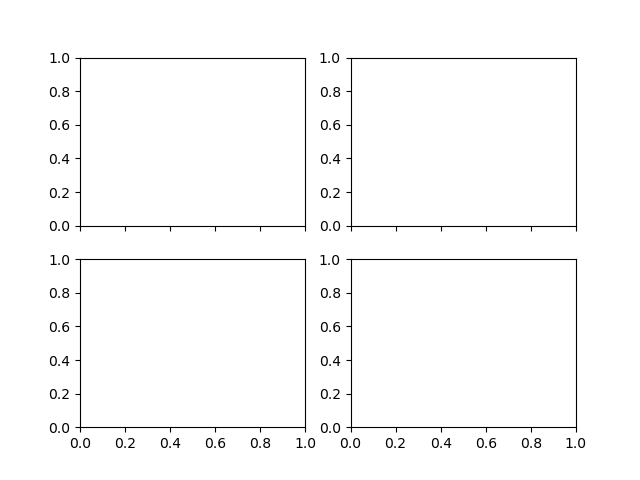

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

Note that we īncluded `sharex=True` in our command, which will ensure that all four panels have the same x-axis.

This returned two things as usual, `fig`: the `figure` containing all our axes, and `ax`, which is a list of the subplot axes.  We can specify which axes we want to use for each graph by remembering that Python counts from zero and noting that _the axes are indexed by row and then by column_.

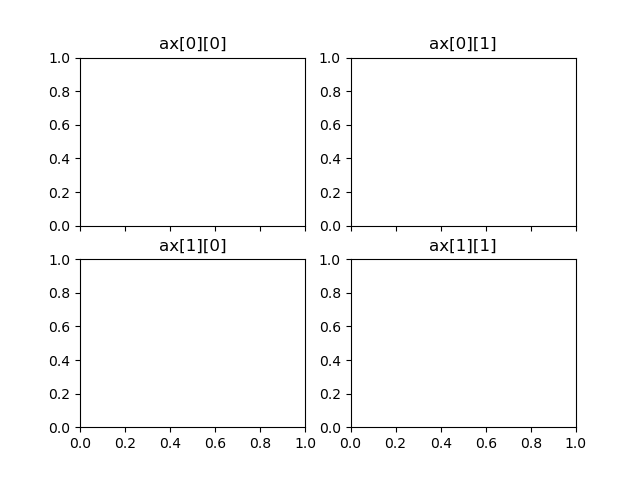

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)
for column in range(2):
    for row in range(2):
        ax[row][column].set_title(f"ax[{row}][{column}]")

Right, let's plot actual data using two loops to run through the parameters and axes:

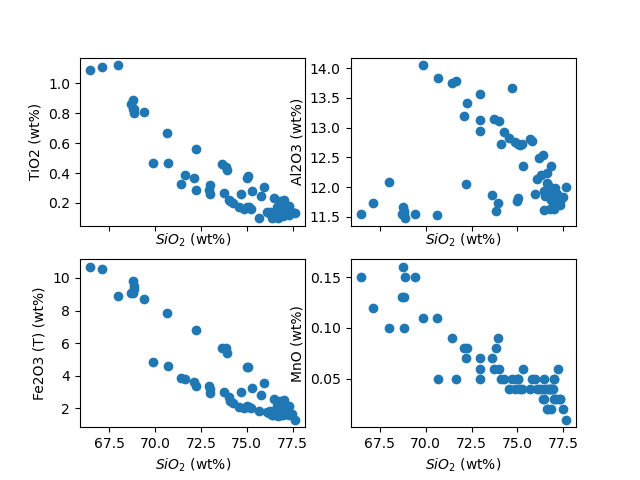

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

elements = [["TiO2 (wt%)", "Al2O3 (wt%)"], ["Fe2O3 (T) (wt%)", "MnO (wt%)"]]
for column in range(2):
    for row in range(2):
        element_name = elements[row][column]
        ax[row][column].scatter(geochem["SiO2 (wt%)"], geochem[element_name])
        ax[row][column].set_ylabel(element_name)
        ax[row][column].set_xlabel("$SiO_2$ (wt%)")

The y-axis labels are getting in the way a bit but we can easily avoid this as follows:

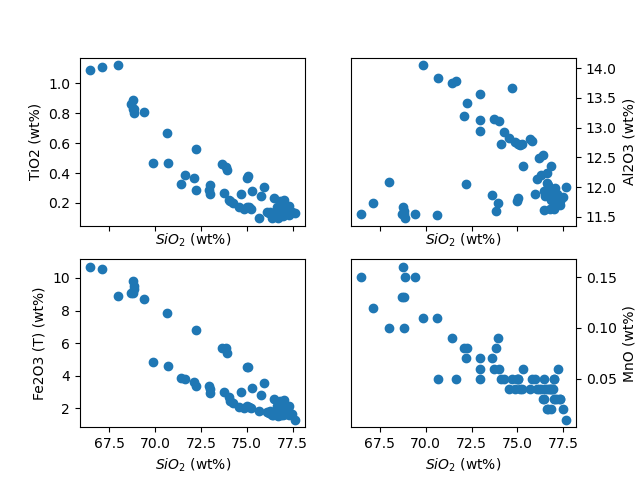

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

elements = [["TiO2 (wt%)", "Al2O3 (wt%)"], ["Fe2O3 (T) (wt%)", "MnO (wt%)"]]
for column in range(2):
    for row in range(2):
        element_name = elements[row][column]
        ax[row][column].scatter(geochem["SiO2 (wt%)"], geochem[element_name])
        ax[row][column].set_ylabel(element_name)
        ax[row][column].set_xlabel("$SiO_2$ (wt%)")
        if column == 1:
            ax[row][column].yaxis.tick_right()
            ax[row][column].yaxis.set_label_position("right")

### Exercise:

Try writing some code to plot the four parameters of interest against $SiO_2$ in a 1x4 subplot layout with a common y-axis ($SiO_2$).

In [ ]:
# Your answer here

## Regression

We can infer from the plots above that $Fe_2O_3$ and $TiO_2$ exhibit very similar behaviour with regard to $SiO_2$. Sure enough, we find when we plot one against the other that they have are highly correlated:

<AxesSubplot:xlabel='Fe2O3 (T) (wt%)', ylabel='TiO2 (wt%)'>

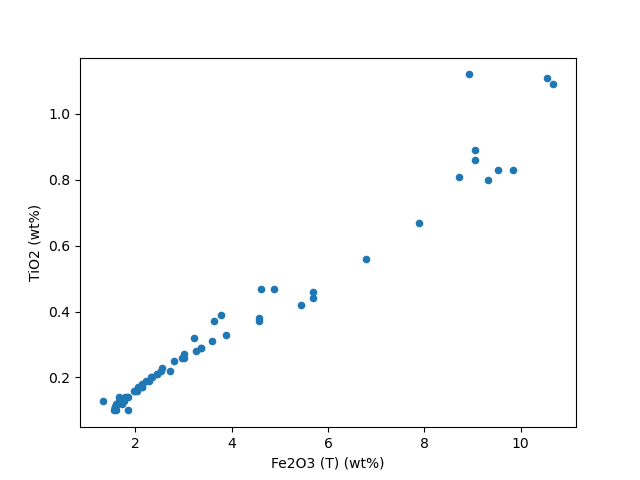

In [11]:
geochem.plot(x="Fe2O3 (T) (wt%)",y="TiO2 (wt%)",kind='scatter')

We'll use these two parameters to briefly explore linear regression. There are myriad ways to do this in Python but perhaps the simplest to start with is numpy's [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) algorithm. 

In [ ]:
import numpy as np

model, covariance = np.polyfit(geochem['Fe2O3 (T) (wt%)'], geochem['TiO2 (wt%)'], 1, cov=True)
print(model)
print(covariance)

What we've done is fit a linear model of the form $y=ax+b$ to the Fe (x) and Ti (y) oxide dat, using least-squares. We could have fit a quadratic model by simply changing the "1" at the end of the command to "2".

We can define a simple function to construct a function from the model parameters that, when re-applied to the Fe data, will return the predicted Ti measurements:

In [ ]:
def pred_func(x):
    return (x * model[0]) + model[1]

Ti_predicted = geochem['Fe2O3 (T) (wt%)'].apply(pred_func)

Let's plot the results to see what we've found and whether it makes sense.

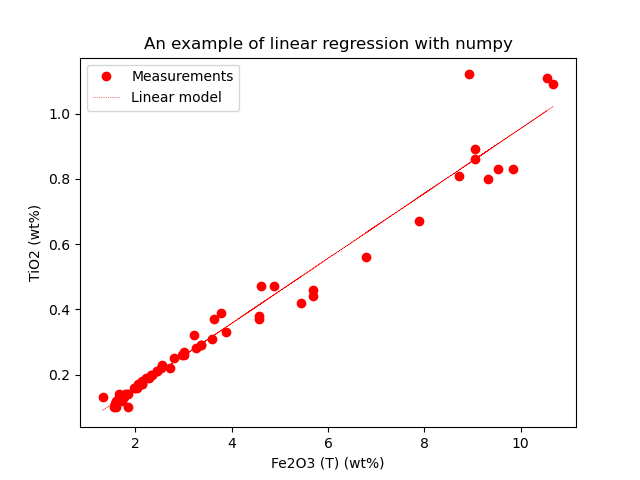

In [14]:
fig, ax=plt.subplots()
ax.plot(geochem['Fe2O3 (T) (wt%)'],geochem['TiO2 (wt%)'],'o',color='red',label='Measurements')
ax.plot(geochem['Fe2O3 (T) (wt%)'],Ti_predicted,label='Linear model',linestyle='dotted',linewidth=0.5,color='red')
ax.set_xlabel("Fe2O3 (T) (wt%)")
ax.set_ylabel("TiO2 (wt%)")
ax.set_title("An example of linear regression with numpy")
ax.legend()
plt.show()

## More on dates and times and datetimes

In the previous notebook, we made our GeoNet query using `str` objects for the start and end-time arguments, but Python has nice native ways of working with dates and times. These do useful things like cope with leap-years, allow you to add seconds (or other time units) to dates and times, and allow you to format dates and times as `str` objects.

We should switch from giving `str`s to giving `datetime`s.  `datetime` objects come from Python's native `datetime` library, and include a handy `.strftime` method which is literally string-format-time.  We will use that to make the correctly formatted string for our query.  The query requires something of the format:

> year-month-dayThour:minute:second

In `datetime` speak the format string for that is:

> `%Y-%m-%dT%H:%M:%S`

- `%Y` is a four-digit year (e.g.: ..., 2018, 2019, 2020, ...)
- `%m` is a two-digit month (e.g.: 01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12)
- `%d` is a two-digit day (zero-padded as months are, e.g.: 01, 02, ... 28, 29, 30, 31)
- `T` is just a letter, anything not preceded by a `%` sign is interpreted as a `str`
- `%H` is a two-digit hour (as above)
- `%M` is a two-digit minute (as above)
- `%S` is a two-digit second (as above).

Other formatters, for things like day of the week, month as a word, julian-day, milliseconds, etc. can be found in the [offical docs](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

Lets see how we could format a `datetime`.  To start we need to make a `datetime` object, we can provide arguments of the year, month, day, hour, minute, second, (millisecond) to make one:

In [ ]:
# datetime is the module, datetime.datetime is the object itself
test_time = datetime.datetime(2020, 1, 10, 12, 43, 10)
print(test_time)

Now lets format the string the way that we want it:

In [ ]:
print(test_time.strftime("%Y-%m-%dT%H:%M:%S"))

**Exercise:** format the `datetime` object as "year/month/day hour:minute:seconds" and then try some other formats using the information listed in the [offical docs](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

In [ ]:
# Your answer here

Now that we know how it all works, lets put it together into a function with some useful
arguments that we can query.

## Querying a dataframe using a function

We will set some default values for our arguments, so that we do not always have to
specify every argument.  These defaults are given in the function definition as:

```python
def function(argument=value, ...):
    contents_of_function
```
where `argument` is the argument name, and `value` is the default value for that argument:

In [ ]:
def get_geonet_quakes(
    min_latitude=-49.0, max_latitude=-40.0,
    min_longitude=164.0, max_longitude=182.0,
    min_magnitude=1, max_magnitude=9.0,
    min_depth=0.0, max_depth=500.0,
    start_time=datetime.datetime(1960, 1, 1),
    end_time=datetime.datetime(2020, 1, 1),
):
    """
    Get a dataframe of the eatrhquakes in the GeoNet catalogue.
    
    Parameters
    ----------
    min_latitude
        Minimum latitude in degrees for search
    max_latitude
        Maximum latitude in degrees for search
    min_longitude
        Minimum longitude in degrees for search
    max_longitude
        Maximum longitude in degrees for search
    min_depth
        Minimum depth in km for search
    max_depth
        Maximum depth in km for search
    min_magnitude
        Minimum magnitude for search
    max_magnitude
        Maximum magnitude for search
    start_time
        Start date and time for search
    end_time
        End date and time for search
        
    Returns
    -------
    pandas.DateFrame of resulting events
    """
    # Convert start_time and end_time to strings
    start_time = start_time.strftime("%Y-%m-%dT%H:%M:%S")
    end_time = end_time.strftime("%Y-%m-%dT%H:%M:%S")
    # Use the more efficient f-string formatting
    query_string = (
        "https://quakesearch.geonet.org.nz/csv?bbox="
        f"{min_longitude},{min_latitude},{max_longitude},"
        f"{max_latitude}&minmag={min_magnitude}"
        f"&maxmag={max_magnitude}&mindepth={min_depth}"
        f"&maxdepth={max_depth}&startdate={start_time}"
        f"&enddate={end_time}")
    print(f"Using query: {query_string}")
    response = requests.get(query_string)
    with open("data/earthquakes.csv", "wb") as f:
        f.write(response.content)
    earthquakes = pd.read_csv(
        "data/earthquakes.csv", 
        parse_dates=["origintime", "modificationtime"],
        dtype={"publicid": str})
    earthquakes = earthquakes.rename(
        columns={" magnitude": "magnitude",
                 " latitude": "latitude",
                 " depth": "depth"})
    return earthquakes

Lets quickly run this function to get the data.  There won't be any output.  Note that I didn't
provide these data in the repository because:
1. I don't have permission to re-distribute the data and,
2. this dataset gets updated frequently!

In [ ]:
earthquakes = get_geonet_quakes(
    start_time=datetime.datetime(2015, 1, 1),min_magnitude=3)

print(earthquakes.columns)

## Do something useful: applying functions to a dataframe

We saw in the previous notebook how we could sort and slice a dataframe in various ways.Let's look at
an example of doing some actual calculations with a dataframe.  We will use some of what we have
learnt to calculate the occurance rate of earthquakes within a region.  In this case
we will take the region around the top of South Island, containing the faults that ruptured
in the Kaikoura earthquake.

In [ ]:
kaikoura = get_geonet_quakes(
    min_latitude=-43.12, max_latitude=-41.15,
    min_longitude=172.37, max_longitude=174.95,
    start_time=datetime.datetime(2010, 1, 1),
    min_magnitude=2)
# Rename those columns
kaikoura = kaikoura.rename(
    columns={" magnitude": "magnitude",
             " latitude": "latitude",
             " depth": "depth"})

print(f"Downloaded {len(kaikoura)} earthquakes")

Earthquake rate is the number of earthquakes per unit time.  For a dataset like this we can calculate
rate as 1 over the inter-event time.

First we need to sort by origin time:

In [ ]:
kaikoura = kaikoura.sort_values(by=["origintime"], ignore_index=True)

Then we need to calculate the time between each successive earthquake.  We can do this by
taking the `origintime` column away from a one-sample shifted version of the `origintime` column,
much like we did for calculating the temperature gradient in the DFDP drillhole. In Pandas we
can do this quickly using the `.diff` method:

In [ ]:
inter_event_time = kaikoura["origintime"].diff()
print(inter_event_time)

This column is in `timedelta` format. Lets convert it to seconds:

In [ ]:
inter_event_time = inter_event_time.dt.total_seconds()
print(inter_event_time)

The rate is simply 1 / `inter_event_time`:

In [ ]:
rate = 1 / inter_event_time

In [ ]:
print(rate)

We can now add this column into the dataframe and call it `"rate"`:

In [ ]:
kaikoura['rate'] = rate

We can plot rate as a function of time. Remember that the time values we use here are the
event origin-times, which do not directly represent the time of the rate calculated, which
is an average between events:

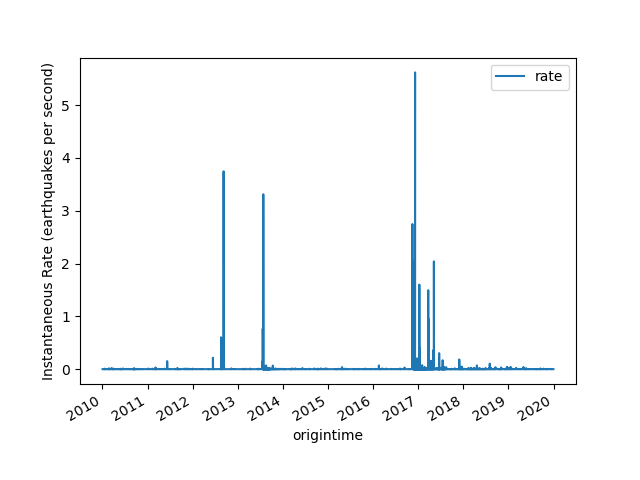

In [27]:
ax = kaikoura.plot(x="origintime", y="rate")
ax.set_ylabel("Instantaneous Rate (earthquakes per second)")
plt.show()

There is lots more that you can do with dataframes.  Pandas is in heavy use in the datascience
world, and allows you to quickly explore datasets.  Hopefully you will find it useful at some
point in your Geoscience career.

As a final thing, you can save your dataframes:

In [ ]:
kaikoura.to_csv("data/kaikoura.csv", index=False)

## Summary

That covers *some* of the basics of `dataframes` in pandas.  You should be able to use them to replace most of what you would have done with spreadsheets to allow you to work in a more programatic and reproducible way. We also demonstrated some of the basics of fitting simple polynomials to data.  Note that numpy's `polyfit` function isn't limited to 1st order polynomials, the sky is the limit!


## Extension: more sophisticated analysis of a dataframe

### Extension: computing b-values

Earthquake generally follow a Gutenberg-Richter relationship, where the logarithm of the cumulative number of earthquakes above a given magnitude is proportional to the magnitude:
\begin{equation}
    \log_{10}{N} = a - bM
\end{equation}
where *M* is magnitude, *N* is the number of events with magnitude >= *M*, and *a* and *b* are constants. This is a nice simple straight-line equation with offset from the origin given by *a* and the gradient by *b*.

Some studies (for example, [Nuannin et al., 2005](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005GL022679)) have found variations in b-value with time and space, and related this to changes in stress.  Lets see if we can:
1. Calculate the b-value for our dataset;
2. Do some sliding-window fu to get at b-value variations in time.

To kick us off, note that in our analysis we are going to miss one fundamental thing which means that everything we do is wrong.  That thing is catalogue completeness, upon which our b-value calculations depend. To show that completeness, and have a first pass at computing b-values, lets look at a cumulative distribution of earthquake magnitudes.

### Plotting cumulative distributions

We want an inverse cumulative plot of magnitudes. We can do this with matplotlib's `hist` by setting the `cumulative` argument to `-1`, and the `density` argument set to `True`:

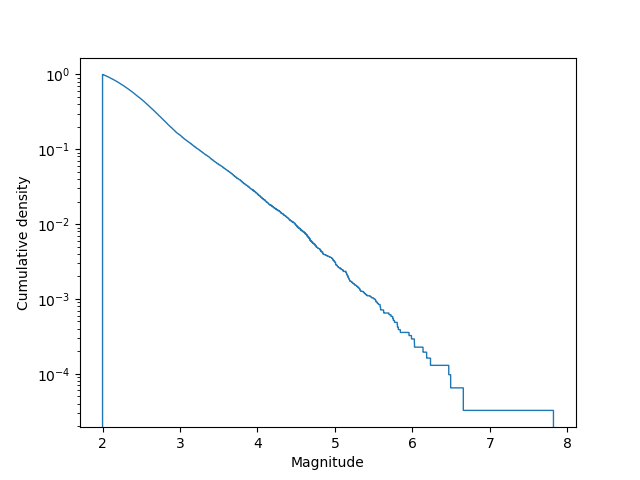

In [29]:
fig, ax = plt.subplots()
ax.hist(
    kaikoura["magnitude"], bins=len(kaikoura), 
    histtype="step", density=True, log=True, 
    cumulative=-1)
ax.set_xlabel("Magnitude")
ax.set_ylabel("Cumulative density")
plt.show()

Looks pretty straight on a log-normal plot, as we would expect from the Gutenberg-Richter law.  However, somewhere between M 2 and 3 it stops being straight.  We assume that our catalogue completeness is somewhere in here.  This means that we think that, if we could detect and catalogue all the earthquakes all the way down to the tiny earthquakes, we would continue seeing this log-normal relationship. So, we assume that below our magnitude of completeness ($M_C$) we are missing earthquakes.  This seems reasonable, as earthquakes get smaller they get much harder to detect simply because their amplitudes are greatly reduced.

Lets *assume* our catalogue is complete to $M_C=2.5$ and try and fit a straight line to our cumulative-density plot.

First we will count how many times each magnitude appears in our dataset, we will use a handy object in Pythons native `collections` library, called `Counter`:

In [ ]:
from collections import Counter

counted_magnitudes = Counter(kaikoura["magnitude"])

print(counted_magnitudes.most_common(10))  # Print the most common 10 magnitudes

Cool, that gives us a list of the magnitude and the number of occurrences of that magnitude.  What we actually want is magnitudes and the number of occurrences of that magnitude and *any magnitude above that magnitude*.  To do that we will:
1. create a unique set of all the magnitudes

In [ ]:
magnitudes = set(kaikoura["magnitude"])

2. Make a sorted `list` from this set:

In [ ]:
magnitudes = sorted(list(magnitudes), reverse=True)

3. Remove all magnitudes below our completeness using a [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) (because they are handy):

In [ ]:
magnitudes = [m for m in magnitudes if m >= 2.5]

4. Initialise an empty array in which we will put the cumulative density function

In [ ]:
import numpy as np

density = np.zeros(len(magnitudes))

5. Loop through the magnitudes from largest to smallest and add the number of occurrences of that magnitude to the total occurrences of the previous magnitude bin:

In [ ]:
density[0] = counted_magnitudes[magnitudes[0]]
for i, magnitude in enumerate(magnitudes[1:]):
    density[i + 1] = density[i] + counted_magnitudes[magnitude]

Lets check that that looks okay by plotting it:

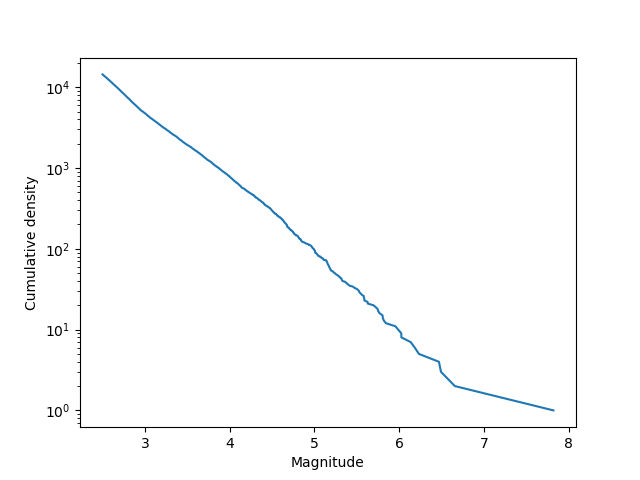

In [36]:
fig, ax = plt.subplots()
ax.semilogy(magnitudes, density)
ax.set_ylabel("Cumulative density")
ax.set_xlabel("Magnitude")
plt.show()

Looks good! Now lets try and fit a line to it.  We can use `numpy`'s solvers to do this. Because this is a nice
simple equation we will use the [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function:

In [ ]:
coefficients, residual, rank, singular_values, rcondition = np.polyfit(
    magnitudes, np.log10(density), deg=1, full=True)
b, a = coefficients
print(f"a={a:.2f}, b={b:.2f}")

b is usually close to 1 (note that the gradient calculated above is negative, which is already taken care of in the Gutenberg-Richter law). 

Lets estimate the density from our calculated values:

In [ ]:
# To make our lives easier we will convert our magnitudes to a numpy array:
magnitudes = np.array(magnitudes)
estimated_density = 10 ** (a + (magnitudes * b))

Right, lets see if it fits!

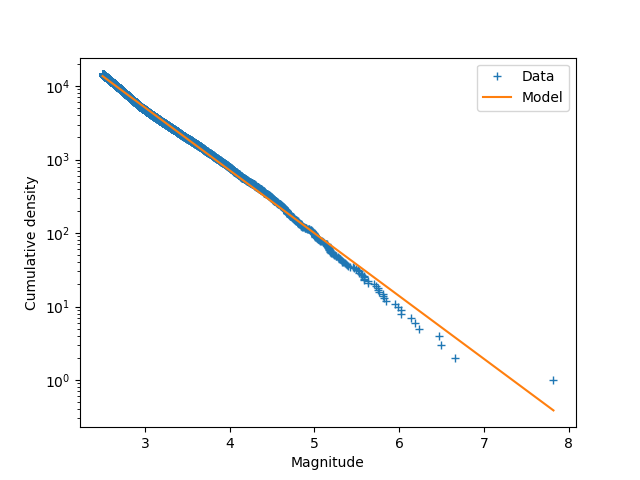

In [39]:
fig, ax = plt.subplots()
ax.semilogy(
    magnitudes, density, marker="+", linestyle="None",
    label="Data")
ax.semilogy(magnitudes, estimated_density, label="Model")
ax.set_ylabel("Cumulative density")
ax.set_xlabel("Magnitude")
ax.legend()
plt.show()

Note that because we specified `full=True` in our call to `polyfit`, we were returned a range of metrics about how well-fitted our data were.  The easiest one of those to understand is the residual:

In [ ]:
print(residual)

This is a measure of the misfit between our model and our data.

Lets build a simple function to do this with the aim of applying this to distinct time-chunks of our dataset:

In [ ]:
def calc_b_value(magnitudes, completeness_magnitude=2.5):
    """
    Calculate the b-value for a range of magnitudes.
    
    Parameters
    ----------
    magnitudes
        List or array of magnitudes
    completeness_magnitude
        Magnitude of completeness for the dataset
        
    Returns
    -------
    b-value
    """
    counted_magnitudes = Counter(magnitudes)
    magnitudes = sorted(list(set(magnitudes)), reverse=True)
    magnitudes = np.array(magnitudes)
    # Remove magnitudes less than completess
    magnitudes = magnitudes[magnitudes >= completeness_magnitude]
    # Calculate density
    density = np.zeros(len(magnitudes))
    density[0] = counted_magnitudes[magnitudes[0]]
    for i, magnitude in enumerate(magnitudes[1:]):
        density[i + 1] = density[i] + counted_magnitudes[magnitude]
    coefficients, residual, rank, singular_values, rcondition = np.polyfit(
        magnitudes, np.log10(density), deg=1, full=True)
    b, a = coefficients
    return b

Lets check that we get the same b-value as we did before:

In [ ]:
b = calc_b_value(kaikoura["magnitude"])
print(f"b={b:.2f}")

### Rolling windows with Pandas

Pandas has neat ways of doing rolling windows.  We will use this to do two things:
1. Calculate the median date for every 2000 earthquakes;
2. Calculate the b-value for every 2000 earthquakes.

We will then plot these and see if we see any variations.

To calculate the median date we will:
1. sort the dataframe by `"origintime"`
2. Extract just the `"origintime"` and `"magnitude"` columns

In [ ]:
window_size = 2000

kaikoura = kaikoura.sort_values(by=["origintime"], ignore_index=True)
magnitude_times = pd.concat([kaikoura["origintime"], kaikoura["magnitude"]], axis=1)

3. Make a new column containing the seconds since the first event - pandas doesn't have a simple way to calculate the median of a range of datetimes, so we will change to working in seconds since a reference time

In [ ]:
seconds_offset = (magnitude_times.origintime - magnitude_times.origintime[0]).dt.total_seconds()
magnitude_times = magnitude_times.merge(
    seconds_offset.rename("seconds_offset"), left_index=True, right_index=True)

4. Compute the rolling median of the seconds_offset column

In [ ]:
window_median = magnitude_times.seconds_offset.rolling(window_size).median()

5. Convert this column to timedelta objects

In [ ]:
window_median = pd.to_timedelta(window_median, unit="S") # Unit is seconds

6. Add the reference time to these to get back to real-time

In [ ]:
window_median += magnitude_times.origintime[0]

7. Put this into the dataframe as a new column

In [ ]:
magnitude_times = magnitude_times.merge(
    window_median.rename("window_median"), left_index=True, right_index=True)

### Computing moving window b-values

Computing the moving b-value is a little simpler to write, but slower to run.  We will use the function we wrote above and pandas `.rolling().apply(func)` chained method to apply our custom `func` to our column:

In [ ]:
b_values = magnitude_times.magnitude.rolling(window_size).apply(calc_b_value)

Lets quickly convert those from gradients to b-values by multiplying by -1:

In [ ]:
b_values *= -1

Now we can put those back into the dataframe:

In [ ]:
magnitude_times = magnitude_times.merge(
    b_values.rename("b_value"), left_index=True, right_index=True)

### Plotting the results

Now lets plot it:

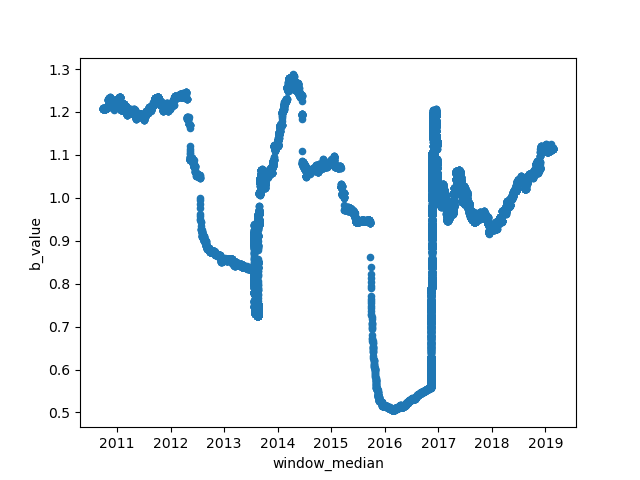

In [52]:
ax = magnitude_times.plot(x="window_median", y="b_value", kind="scatter")

### What next?

There are some pretty impressive variations there! In particular there are strong variations in 2013 and 2016, right around when the Cook Strait and Kaikoura earthquakes happened. I wonder if there is anything in that...? **before we get ahead of ourselves**, we missed some key things here that mean that this result is not interpretable:
1. Not all magnitudes are equal, and we were just using GeoNet's summary magnitude;
2. We fixed the magnitude of completeness when in reality completeness depends on a range of factors and is time-varying;
3. We haven't taken spatial variations into account - we have looked at quite a large region here.

We could get around those factors though and extend our rolling window to compute completeness alongside b-value. Potential student project...?

**Exercise:** Using pandas rolling windows, find the mean earthquake location for every window we used above. You will need to compute the rolling mean for latitude, longitude and depth.  Make three plots to show how latitude, longitude and depth vary with time.

In [ ]:
# Your answer here